In [1]:
# Importing the necessary libraries for data handling, model building, and text processing
import csv  # For reading and writing CSV files
import tensorflow as tf  # TensorFlow library for deep learning
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting and visualizing data

# Importing necessary modules from TensorFlow Keras API for text processing
from tensorflow.keras.preprocessing.text import Tokenizer  # To tokenize text data
from tensorflow.keras.preprocessing.sequence import pad_sequences  # For padding sequences to ensure uniform length
from tensorflow.keras.models import Sequential  # Sequential model type for stacking layers linearly
from tensorflow.keras.layers import Dense, Flatten, LSTM, Dropout, Activation, Embedding, Bidirectional, SimpleRNN  # Common layers

# Importing the Natural Language Toolkit (nltk) library for text processing
import nltk
nltk.download('stopwords')  # Downloading stopwords dataset
from nltk.corpus import stopwords  # For filtering common English stopwords
STOPWORDS = set(stopwords.words('english'))  # Converting stopwords to a set for fast lookups


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Defining parameters for text processing and model architecture

vocab_size = 5000  # Maximum number of unique words (tokens) the tokenizer will keep.
                   # If a text has more unique words, only the 5000 most frequent ones will be kept.

embedding_dim = 64  # Dimension of the word embedding vectors. Each word will be represented
                    # as a 64-dimensional vector in the embedding layer, capturing its semantic meaning.

max_length = 200  # Maximum length of sequences after padding. All sequences longer than 200 words
                  # will be truncated, and those shorter will be padded, ensuring uniform length for input.

oov_tok = '<OOV>'  # Token for "Out of Vocabulary" words, words not in the vocab will be represented by this token.

training_portion = 0.8  # Proportion of the dataset to be used for training. 80% of the data
                        # will be used for training, and the remaining 20% for validation or testing.


In [ ]:
# Initializing empty lists to store text data and their labels
articles = []  # List to hold the articles (text data)
labels = []  # List to hold the labels (categories) of the articles

# Opening and reading the CSV file
with open("/content/bbc-text.csv", 'r') as csvfile:  # Open the file in read mode
    reader = csv.reader(csvfile, delimiter=',')  # Create a CSV reader object
    next(reader)  # Skip the header row

    # Loop through each row in the CSV file
    for row in reader:
        labels.append(row[0])  # The first column is assumed to be the label, so add it to labels
        article = row[1]  # The second column is the article text

        # Removing stopwords from the article
        for word in STOPWORDS:
            token = ' ' + word + ' '  # Add spaces to avoid partial matches within other words
            article = article.replace(token, ' ')  # Replace stopwords with a single space
            article = article.replace('  ', ' ')  # Remove extra spaces if any

        articles.append(article)  # Add the cleaned article to the articles list


In [ ]:
#This line will return the lengths of the labels and articles lists, allowing you to verify that each article has a corresponding label.
len(labels),len(articles)

(2225, 2225)

In [ ]:
# Display the first label and article to verify that data was loaded and processed correctly
labels[0], articles[0]


('tech',
 'tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes. us leading trend  programmes content delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us tivo uk sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take europe lack high-definition programming. people forward wind adverts  also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite

In [ ]:
# Calculating the number of articles to include in the training set based on the training portion
train_size = int(len(articles) * training_portion)  # Compute training set size as 80% of the total articles

# Splitting the articles and labels into training and validation sets
train_articles = articles[0: train_size]  # First 80% of articles for training
train_labels = labels[0: train_size]      # First 80% of labels for training

validation_articles = articles[train_size:]  # Remaining 20% of articles for validation
validation_labels = labels[train_size:]      # Remaining 20% of labels for validation


In [ ]:
# Printing the number of samples in each dataset split to verify the 80/20 division
print('train_articles:', len(train_articles))  # Should print the number of articles in the training set
print('train_labels:', len(train_labels))      # Should match the number of training articles, confirming label alignment
print('validation_articles:', len(validation_articles))  # Number of articles in the validation set
print('validation_labels:', len(validation_labels))      # Should match the number of validation articles


train_articles 1780
train_labels 1780
validation_articles 445
validation_labels 445


In [ ]:
# Initializing the tokenizer with the specified vocabulary size and OOV token
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)  # Limit vocabulary to `vocab_size` and handle unknown words with `oov_tok`

# Fitting the tokenizer on the training articles to create the vocabulary
tokenizer.fit_on_texts(train_articles)  # Builds the word index based on word frequency in the training data

# Retrieving the word index, which maps each word to a unique integer based on its frequency
word_index = tokenizer.word_index  # Dictionary where keys are words and values are their respective indices


In [ ]:
# Display the word index to see the mapping of words to their respective indices
print(word_index)


{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'people': 7,
 'new': 8,
 'us': 9,
 'one': 10,
 'could': 11,
 'last': 12,
 'first': 13,
 'time': 14,
 'two': 15,
 'government': 16,
 'world': 17,
 'uk': 18,
 'best': 19,
 'years': 20,
 'make': 21,
 'film': 22,
 'told': 23,
 'made': 24,
 'get': 25,
 'music': 26,
 'game': 27,
 'like': 28,
 'back': 29,
 'many': 30,
 '000': 31,
 'labour': 32,
 'three': 33,
 'well': 34,
 '1': 35,
 'next': 36,
 'bbc': 37,
 'take': 38,
 'set': 39,
 'number': 40,
 'added': 41,
 'way': 42,
 'market': 43,
 '2': 44,
 'company': 45,
 'may': 46,
 'says': 47,
 'election': 48,
 'home': 49,
 'party': 50,
 'good': 51,
 'going': 52,
 'much': 53,
 'work': 54,
 '2004': 55,
 'still': 56,
 'win': 57,
 'show': 58,
 'think': 59,
 'games': 60,
 'go': 61,
 'top': 62,
 'second': 63,
 'million': 64,
 '6': 65,
 'england': 66,
 'firm': 67,
 'since': 68,
 'week': 69,
 'say': 70,
 'play': 71,
 'part': 72,
 'public': 73,
 'use': 74,
 'blair': 75,
 '3': 76,
 'want'

In [ ]:
# Converting a sample sentence into a sequence of integers using the tokenizer
sequence = tokenizer.texts_to_sequences(['the cat sat on my table'])
print(sequence)


[[1152, 1, 1, 577, 1, 2198]]

In [ ]:
# Converting all training articles into sequences of integers using the tokenizer
train_sequences = tokenizer.texts_to_sequences(train_articles)

# Checking the number of sequences generated from the training articles
print(len(train_sequences))  # Should match the number of training articles


1780

In [ ]:
# Displaying the first sequence from the training sequences
print(train_sequences[0])


[91,
 160,
 1141,
 1106,
 49,
 979,
 755,
 1,
 89,
 1304,
 4288,
 129,
 175,
 3653,
 1214,
 1195,
 1576,
 42,
 7,
 893,
 91,
 1,
 334,
 85,
 20,
 14,
 130,
 3261,
 1215,
 2421,
 570,
 451,
 1375,
 58,
 3378,
 3521,
 1660,
 8,
 921,
 730,
 10,
 844,
 1,
 9,
 598,
 1577,
 1107,
 395,
 1940,
 1106,
 731,
 49,
 538,
 1397,
 2010,
 1621,
 134,
 249,
 113,
 2355,
 795,
 4980,
 980,
 584,
 10,
 3956,
 3957,
 921,
 2562,
 129,
 344,
 175,
 3653,
 1,
 1,
 39,
 62,
 2867,
 28,
 9,
 4723,
 18,
 1305,
 136,
 416,
 7,
 143,
 1422,
 71,
 4501,
 436,
 4981,
 91,
 1107,
 77,
 1,
 82,
 2011,
 53,
 1,
 91,
 6,
 1008,
 599,
 89,
 1304,
 91,
 1963,
 131,
 137,
 420,
 9,
 2868,
 38,
 152,
 1234,
 89,
 1304,
 4724,
 7,
 436,
 4981,
 3153,
 6,
 2492,
 1,
 431,
 1126,
 1,
 1423,
 571,
 1261,
 1902,
 1,
 766,
 9,
 538,
 1397,
 2010,
 134,
 2067,
 400,
 845,
 1964,
 1599,
 34,
 1717,
 2869,
 1,
 1,
 2422,
 244,
 9,
 2624,
 82,
 732,
 6,
 1173,
 1196,
 152,
 720,
 591,
 1,
 124,
 28,
 1305,
 1690,
 432,
 83,
 93

In [ ]:
# Padding the training sequences to ensure uniform length
train_padded = pad_sequences(train_sequences, maxlen=max_length)  # Pad sequences to a maximum length of `max_length`


In [ ]:
# Checking the number of padded sequences and the length of the first sequence
print(len(train_padded), len(train_padded[0]))


(1780, 200)

In [ ]:
# Converting the validation articles into sequences of integers using the tokenizer
validation_sequences = tokenizer.texts_to_sequences(validation_articles)

# Padding the validation sequences to ensure uniform length
validation_padded = pad_sequences(validation_sequences, maxlen=max_length)  # Pad sequences to a maximum length of `max_length`


In [ ]:
# Displaying the unique labels present in the labels list
unique_labels = set(labels)
print(unique_labels)


{'business', 'entertainment', 'politics', 'sport', 'tech'}

In [ ]:
# Initializing the tokenizer for labels
label_tokenizer = Tokenizer()  # Creating a new tokenizer instance for the labels

# Fitting the tokenizer on the labels to create a mapping of labels to integers
label_tokenizer.fit_on_texts(labels)  # Analyzing the label data to create a word index for labels

# Converting training labels into sequences of integers using the label tokenizer
training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))  # Transforming train labels to sequences

# Converting validation labels into sequences of integers using the label tokenizer
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))  # Transforming validation labels to sequences


In [ ]:
# Displaying the original training label and its corresponding encoded sequence
print('Original Label:', train_labels[0])  # Shows the original label for the first training article
print('Encoded Label Sequence:', training_label_seq[0])  # Shows the encoded label sequence for the first training article


('tech', array([4]))

In [ ]:
#the code with comments explaining each part of your sequential model definition using Keras:
# Creating a Sequential model for text classification
model = Sequential()

# Adding an embedding layer to transform the input sequences into dense vectors
model.add(Embedding(vocab_size, embedding_dim))  # Input dimension: vocab_size, Output dimension: embedding_dim

# Adding a dropout layer to prevent overfitting
model.add(Dropout(0.2))  # 20% of the neurons will be dropped during training

# Adding a Simple RNN layer to learn from the sequential data
model.add(SimpleRNN(units=embedding_dim))  # Number of output units is set to embedding_dim

# Adding another dropout layer to further reduce overfitting
model.add(Dropout(0.2))

# Adding a dense output layer with softmax activation for multi-class classification
model.add(Dense(6, activation='softmax'))  # 6 output units for 6 classes, using softmax for probabilities

# Displaying the model's summary to view its architecture
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          320000    
_________________________________________________________________
dropout (Dropout)            (None, None, 64)          0         
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
Total params: 328,646
Trainable params: 328,646
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Creating an Adam optimizer with a specified learning rate and decay
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)  # Learning rate of 0.001 with a decay rate

# Compiling the model with the specified loss function, optimizer, and evaluation metrics
model.compile(loss='sparse_categorical_crossentropy',  # Loss function for multi-class classification with integer labels
              optimizer=opt,                            # Using the Adam optimizer defined earlier
              metrics=['accuracy'])                    # Tracking accuracy as a performance metric


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# Setting the number of epochs for training
num_epochs = 20

# Training the model on the padded training data
history = model.fit(train_padded,
                    training_label_seq,  # Training data and corresponding labels
                    epochs=num_epochs,    # Number of epochs for training
                    validation_data=(validation_padded, validation_label_seq),  # Validation data and labels
                    verbose=2)           # Verbosity mode (2 = one line per epoch)


Epoch 1/20
56/56 - 4s - loss: 1.7167 - accuracy: 0.2225 - val_loss: 1.6091 - val_accuracy: 0.2337
Epoch 2/20
56/56 - 3s - loss: 1.4920 - accuracy: 0.4399 - val_loss: 1.5733 - val_accuracy: 0.3438
Epoch 3/20
56/56 - 3s - loss: 1.0874 - accuracy: 0.7517 - val_loss: 1.5246 - val_accuracy: 0.3730
Epoch 4/20
56/56 - 3s - loss: 0.5021 - accuracy: 0.9506 - val_loss: 1.5751 - val_accuracy: 0.3753
Epoch 5/20
56/56 - 3s - loss: 0.1523 - accuracy: 0.9972 - val_loss: 1.5303 - val_accuracy: 0.4090
Epoch 6/20
56/56 - 3s - loss: 0.0538 - accuracy: 1.0000 - val_loss: 1.6417 - val_accuracy: 0.4067
Epoch 7/20
56/56 - 3s - loss: 0.0301 - accuracy: 1.0000 - val_loss: 1.7111 - val_accuracy: 0.4180
Epoch 8/20
56/56 - 3s - loss: 0.0197 - accuracy: 1.0000 - val_loss: 1.8146 - val_accuracy: 0.3955
Epoch 9/20
56/56 - 3s - loss: 0.0147 - accuracy: 1.0000 - val_loss: 1.8025 - val_accuracy: 0.4225
Epoch 10/20
56/56 - 3s - loss: 0.0113 - accuracy: 1.0000 - val_loss: 1.8471 - val_accuracy: 0.4157
Epoch 11/20
56/56 -

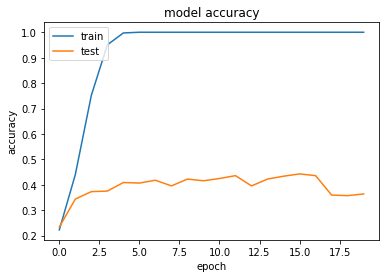

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

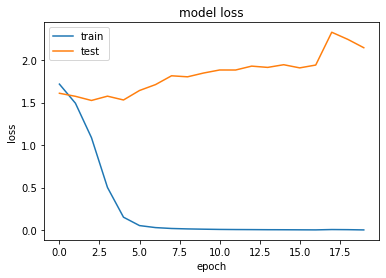

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
# Sample text for prediction
txt = ["blair prepares to name poll date tony blair is likely to name 5 may as election day when parliament returns from its easter break the bbc s political editor has learned. andrew marr says mr blair will ask the queen on 4 or 5 april to dissolve parliament at the end of that week. mr blair has so far resisted calls for him to name the day but all parties have stepped up campaigning recently. downing street would not be drawn on the claim saying election timing was a matter for the prime minister. a number 10 spokeswoman would only say: he will announce an election when he wants to announce an election. the move will signal a frantic week at westminster as the government is likely to try to get key legislation through parliament. the government needs its finance bill covering the budget plans to be passed before the commons closes for business at the end of the session on 7 april. but it will also seek to push through its serious and organised crime bill and id cards bill. mr marr said on wednesday s today programme: there s almost nobody at a senior level inside the government or in parliament itself who doesn t expect the election to be called on 4 or 5 april. as soon as the commons is back after the short easter recess tony blair whips up to the palace asks the queen to dissolve parliament ... and we re going. the labour government officially has until june 2006 to hold general election but in recent years governments have favoured four-year terms."]

# Converting the text to sequences using the tokenizer
seq = tokenizer.texts_to_sequences(txt)

# Padding the sequences to ensure they are of the same length
padded = pad_sequences(seq, maxlen=max_length)

# Predicting the class probabilities for the input text
pred = model.predict(padded)

# List of possible labels corresponding to the output classes
labels = ['sport', 'business', 'politics', 'tech', 'entertainment']

# Printing the predicted probabilities
print(pred)

# Getting the index of the class with the highest predicted probability
print(np.argmax(pred))

# Printing the label corresponding to the highest predicted probability
print(labels[np.argmax(pred) - 1])


[[0.04271967 0.22176012 0.20018357 0.23312835 0.13255644 0.16965184]]
3
politics


In [ ]:
# Sample text for prediction regarding manufacturing jobs
txt = ["call to save manufacturing jobs the trades union congress (tuc) is calling on the government to stem job losses in manufacturing firms by reviewing the help it gives companies. the tuc said in its submission before the budget that action is needed because of 105 000 jobs lost from the sector over the last year. it calls for better pensions, child care provision and decent wages. the 36-page submission also urges the government to examine support other european countries provide to industry. tuc general secretary brendan barber called for a commitment to policies that will make a real difference to the lives of working people. greater investment in childcare strategies and the people delivering that childcare will increases the options available to working parents he said. a commitment to our public services and manufacturing sector ensures that we can continue to compete on a global level and deliver the frontline services that this country needs. he also called for practical measures to help pensioners, especially women who he said are most likely to retire in poverty. the submission also calls for decent wages and training for people working in the manufacturing sector."]

# Converting the input text to sequences using the trained tokenizer
seq = tokenizer.texts_to_sequences(txt)

# Padding the sequences to ensure uniform length
padded = pad_sequences(seq, maxlen=max_length)

# Using the model to predict the class probabilities for the input text
pred = model.predict(padded)

# List of possible class labels corresponding to the model output
labels = ['sport', 'business', 'politics', 'tech', 'entertainment']

# Printing the predicted probabilities for each class
print(pred)

# Getting the index of the class with the highest predicted probability
print(np.argmax(pred))

# Printing the label corresponding to the highest predicted probability
print(labels[np.argmax(pred) - 1])  # Adjusting index if necessary


[[0.00571317 0.00299816 0.92892945 0.02509395 0.01962774 0.01763753]]
2
bussiness
